In [1]:
from ene300.plot import animate_pso, plot_surface, plot_objective_function
from ene300.optimization import PSO, FPA, SOS, GWO, GA
from ene300.functions import shubert, griewank, sixhump, easom, eggholder
import pickle
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from matplotlib import ticker

plt.style.use("~/Dropbox/local/mplstyle/mystyle.mplstyle")

In [2]:
from ene300.plot import plot_surface

# Conjunto de Funções Objetivo

In [3]:
def thermoelectric_system(x):
    a = np.array([26.97, 1.865, 39.79])
    b = np.array([-0.3975, -0.03988, -0.3116])
    c = np.array([0.002176, 0.001138, 0.001457])
    
    PG = x
    F = 0
    for i in range(3):
        F += a[i] + b[i]*PG[i]+c[i]*PG[i]**2
    return F

def regularized_ts(x, alpha=10):
    return thermoelectric_system(x) + alpha*(np.sum(x, axis=0)-550)**2

In [4]:
functions_params = {
                    'shubert' :            dict( objective_function = shubert,
                                                position_boundary = [[-8, 8],   [-8, 8]] ),
                    'griewank' :           dict( objective_function = griewank,
                                                position_boundary = [[-100, 100],   [-100, 100]  ] ),
                    'sixhump' :            dict( objective_function = sixhump,
                                                position_boundary = [[-3, 3],     [-2, 2]    ] ),
                    'easom' :              dict( objective_function = easom,
                                                position_boundary = [[-5, 5], [-5, 5]] ),
                    'eggholder' :          dict( objective_function = eggholder,
                                                position_boundary = [[-512, 512], [-512, 512]] ),
                    'regularized_ts' :     dict( objective_function = regularized_ts,
                                                position_boundary = [[100, 196],  [50, 114]  , [200, 332]] ),
                    }

functions_optimum = {
                    'shubert' :            dict( x=-1.42512791, y=-0.80032055, z=shubert([-1.42512791, -0.80032055])),
                    'griewank' :           dict( x=0, y=0, z=griewank([0,0])),
                    'sixhump' :            dict( x=0.0898,y=-0.7126, z=sixhump([0.0898,-0.7126])),
                    'easom' :              dict( x=np.pi, y=np.pi, z=easom([np.pi, np.pi])),
                    'eggholder' :          dict( x=512, y=404.2319, z=eggholder([512.0, 404.2319])),
                    'regularized_ts' :     dict( x=196. , y=114.,z=regularized_ts([186.6699073 , 114.        , 249.30934834]))
                    }

# Plot Functions

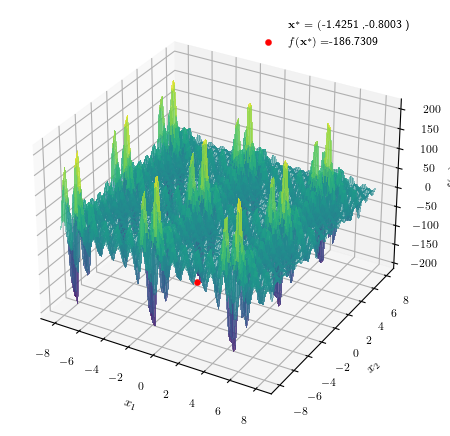

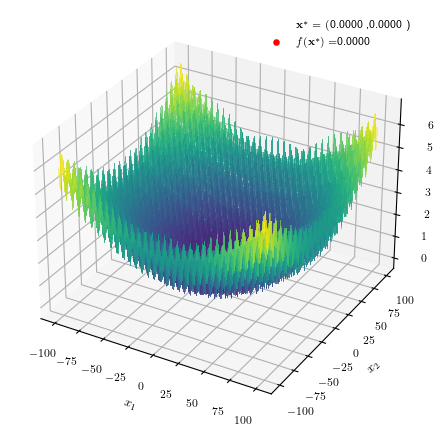

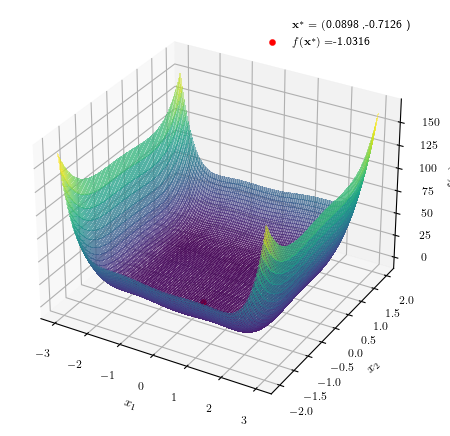

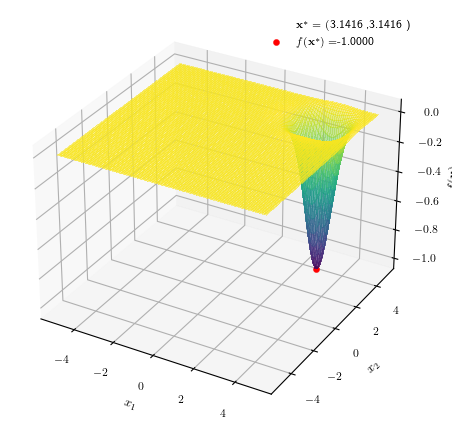

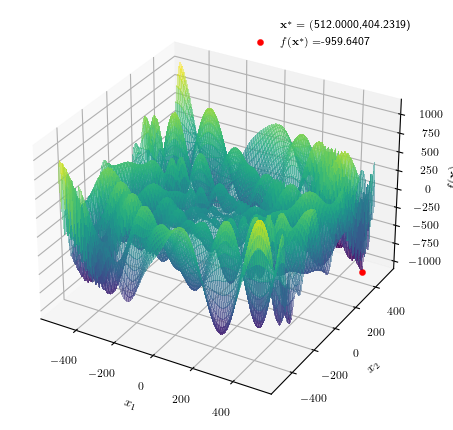

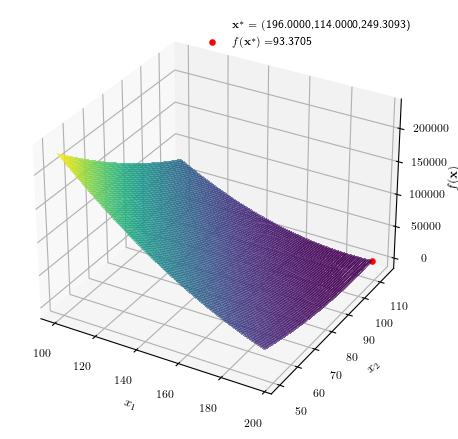

In [5]:
rt=False
for key, value in functions_params.items():
    if key == 'regularized_ts':
        rts = True
    else:
        rts = False
    plot_objective_function(**value, discretization=[100,100], optimum=functions_optimum[key], save_file=f"./latex/{key}_optimum.pdf", rstride=1, cstride=1, antialiased=False, regularized_ts=rts, cmap='viridis', alpha=0.5)
    


In [6]:
function_names = ['shubert', 'griewank', 'sixhump', 'easom', 'eggholder', 'regularized_ts']
function_references = [-186.7309, 0.0, -1.0316, -1.0, -959.640, 250.0, None]

# Optimization Algorithms parameters

In [7]:
max_function_evaluations = 200
optimization_algorithms = {'PSO' : {'algorithm' :   PSO(),                                           
                                    'args'      :   dict(   velocity_boundary = [-1,1],
                                                            #weight = dict(function='constant', constant=0.7) ,
                                                            weight_function = dict(function='random') ,
                                                            #weight = dict(function='linear_decrease', max=2, min=0) ,
                                                            #weight_function = dict(function='sigmoidal_increase', start=0, end=2, n=0.5, u_sign=0.15) , 
                                                            C_function = [ dict(function='constant', constant=1),
                                                                           dict(function='constant', constant=1.5)  ],
                                                            population = 80,
                                                            itmax = max_function_evaluations,
                                                            max_fa = max_function_evaluations)}, 
                           'FPA' : {'algorithm' :   FPA(),                                           
                                    'args'      :   dict(   population = 80, 
                                                            p = 0.75,
                                                            itmax = max_function_evaluations, 
                                                            max_fa = max_function_evaluations)}, 
                           'SOS' : {'algorithm' :   SOS(),                                           
                                    'args'      :   dict(   population = 80, 
                                                            itmax = 80,
                                                            max_fa = max_function_evaluations)},
                           'GWO' : {'algorithm' :   GWO(),                                           
                                    'args'      :   dict(   a_function = dict(function='linear_decrease', max=2, min=0),
                                                            population = 80, 
                                                            itmax = max_function_evaluations,
                                                            max_fa = max_function_evaluations)},
                            'GA' : {'algorithm' :   GA(),                                           
                                    'args'      :   dict(   
                                                            population = 80, 
                                                            itmax = max_function_evaluations,
                                                            max_fa = max_function_evaluations)}
                                                            }

# RUN DOE for Statistics Study at least 20 runs for each case

In [8]:
statistics = {}
runs = 20
#functions_params = {k: functions_params[k] for k in ['eggholder']}

def generate_statistics(functions_params, optimization_algorithms):
    for function_name, function_param in functions_params.items():
        statistics[function_name] = {}
        for oa_name, oa_dict in optimization_algorithms.items():
            statistics[function_name][oa_name] = {'history' : [],
                                                'global_best' : [],
                                                'best_fit': [],
                                                'run_no': []}
            for run in range(20):
                global_best, best_fit, history = oa_dict['algorithm'](**function_param, **oa_dict['args'])
                statistics[function_name][oa_name]['history'].append( history )
                statistics[function_name][oa_name]['global_best'].append( global_best)
                statistics[function_name][oa_name]['best_fit'].append( best_fit )
                statistics[function_name][oa_name]['run_no'].append( run+1 )
                print(function_name, oa_name, run, best_fit)

    return statistics

In [9]:
statistics = generate_statistics(functions_params, optimization_algorithms)

shubert PSO 0 -186.73090883102392
shubert PSO 1 -186.7309088310239
shubert PSO 2 -168.13852345972228
shubert PSO 3 -186.7309088310239
shubert PSO 4 -186.73090883102392
shubert PSO 5 -186.73090883102392
shubert PSO 6 -146.17795024676562
shubert PSO 7 -186.7309088310239
shubert PSO 8 -186.7309088310239
shubert PSO 9 -186.7309088310239
shubert PSO 10 -186.7309088310239
shubert PSO 11 -186.73090883102392
shubert PSO 12 -186.73090883102392
shubert PSO 13 -170.94176475978915
shubert PSO 14 -186.7309088310239
shubert PSO 15 -186.7309088310239
shubert PSO 16 -186.7309088310239
shubert PSO 17 -186.73090883102392
shubert PSO 18 -186.7309088310239
shubert PSO 19 -186.73090883102392
shubert FPA 0 -185.9086831485753
shubert FPA 1 -184.6631495654074
shubert FPA 2 -185.47306134084715
shubert FPA 3 -186.48099291272837
shubert FPA 4 -185.72204524384344
shubert FPA 5 -186.5549742838309
shubert FPA 6 -185.23678414526844
shubert FPA 7 -186.16841103036134
shubert FPA 8 -185.00317146116484
shubert FPA 9 -18

In [ ]:
#with open('statistics.pkl', 'wb') as f:
#       pickle.dump(statistics, f)

In [ ]:
#with open('statistics.pkl', 'rb') as f:
#    statistics = pickle.load(f)

# Boxplots

In [ ]:
def box_plot(function_name, algorithms,  reference=None, fig=None, ax=None, error=None, ylabel=None, savefig=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    value = lambda k : statistics[function_name][k]['best_fit']
    if error is not None and reference is not None:
        value = lambda k : error(statistics[function_name][k]['best_fit'], reference)
   
    if algorithms is None:
        algorithms = list(statistics[function_name].keys())

    data = [value(k) for k in algorithms]
    
    bp_results = ax.boxplot(data)
    ax.set_xticks(list(range(1, len(data)+1)), algorithms[0:len(data)])
    #ax.set_title(function_name)

    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if reference is not None and error is None: 
        ax.axhline(reference, ls=':') 

    plt.tight_layout()
    plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig)

    return bp_results

In [ ]:
def rse(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.sqrt((x-y)**2)

def nrse(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.sqrt((x-y)**2)/abs(y)

def nrsep(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.sqrt((x-y)**2)/abs(y)*100

In [ ]:
function_names = list(functions_params.keys())
function_references = [-186.7309, 0.0, -1.0316, -1.0, -959.640, None]
algorithms=['PSO', 'FPA', 'SOS', 'GWO']
#fig, axs = plt.subplots(len(function_names),1)
for i, function_name in enumerate(function_names):
#    ax = axs[i]
    fig, ax = plt.subplots(figsize=(4,3))
    reference_val = function_references[i]
    box_plot(function_name, algorithms, reference=None, fig=fig, ax=ax, ylabel=rf'$f(\mathbf{{x}}^*)$', error=None, savefig=f"./latex/{function_name}_boxplot_gwo.pgf")

In [ ]:
function_names = list(functions_params.keys())
function_references = [-186.7309, 0.0, -1.0316, -1.0, -959.640, None]
algorithms=['PSO', 'FPA', 'SOS', 'GWO']
#fig, axs = plt.subplots(len(function_names),1)

dict_ = {}
dict_['function'] = []
for algorithm in algorithms:
    dict_[f'ave_{algorithm}'] = []
    dict_[f'std_{algorithm}'] = []

dict_[f'ref'] = [-186.7309, 0.0, -1.0316, -1.0, -959.640, 93.370549]
for i, function_name in enumerate(function_names):
    value = lambda k : statistics[function_name][k]['best_fit']
    dict_['function'].append( function_name )
    for algorithm in algorithms:
        data = [value(k) for k in [algorithm]]
        reference_val = function_references[i]

        dict_[f'ave_{algorithm}'].append(np.average(data))
        dict_[f'std_{algorithm}'].append(np.std(data))
        
        print('algorithm', algorithm, 'function ', function_name, ' average:',np.average(data), 'std', np.std(data))
        #bp_r = box_plot(function_name, algorithms, reference=None, fig=fig, ax=ax, ylabel=rf'$f(\mathbf{{x}}^*)$', error=None, savefig=f"./latex/{function_name}_boxplot_gwo.pgf")
        #bp_results[function_name] = bp_r

In [ ]:
columns=['ave_PSO', 'std_PSO', 'ave_FPA', 'std_FPA', 'ave_SOS', 'std_SOS', 'ave_GWO', 'std_GWO', 'ref']

In [ ]:
table = pd.DataFrame(data=dict_, index=dict_['function'], columns=['ave_PSO', 'std_PSO', 'ave_FPA', 'std_FPA', 'ave_SOS', 'std_SOS', 'ave_GWO', 'std_GWO', 'ref'])
table.T

In [ ]:
statistics['regularized_ts']['PSO']['global_best']

In [ ]:
pd.options.display.float_format = "{:,.4f}".format
print(table.T.to_latex())

In [ ]:
print(table.to_latex())

# Plot convergence with confidence level

In [ ]:
def get_convergence(staticstics,function_name):
    algorithms = list(statistics[function_name].keys())
    line_data = []
    for k in range(len(statistics[function_name][algorithms[0]]['history'])):
        for a in algorithms:
            for i in statistics[function_name][a]['history'][k]['iteration']:
                it = statistics[function_name][a]['history'][k]['iteration'][i-1]
                best_fit = statistics[function_name][a]['history'][k]['best_fit'][i-1]
                algo = a
                line_data.append([it, best_fit, algo])
    line_data = np.array(line_data)
    line_data_df = pd.DataFrame(line_data, columns=['iteration', 'best_fit', 'algorithm'])
    convert_dict = {'iteration': int,
                    'best_fit': np.float64,
                    'algorithm': str }
    line_data_df = line_data_df.astype(convert_dict)

    return line_data_df

def plot_convergence(statistics, function_name, algorithms, ylabel, fig, ax, savefig=None):
    if fig is None and ax is None:
        fig, ax = plt.subplots()    

    line_data_df = get_convergence(statistics, function_name)
    if algorithms is not None:
        line_data_df = line_data_df.query(f"algorithm in {algorithms}")

    sg = sns.lineplot(line_data_df, x='iteration', y='best_fit', hue='algorithm')
    sg.set_ylabel(ylabel)
    #sg.set_title('convergence')
    sg.set_xlabel('iteration')
    #sg.set_title(function_name)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
    plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig)

In [ ]:
algorithms=list(optimization_algorithms.keys())
algorithms=['PSO', 'FPA', 'SOS']
for i, function_name in enumerate(function_names):
#    ax = axs[i]
    fig, ax = plt.subplots(figsize=(4,3))
    plot_convergence(statistics, function_name, algorithms, ylabel=rf'$f(\mathbf{{x}}^*)$', fig=fig, ax=ax , savefig=f'./latex/{function_name}_convergence.pgf')